In [1]:
from main import Model                # the main class
from optimizer import Adam            # the optimizer i will use for training
import numpy as np
import tensorflow.keras as keras      # just for downloading the dataset
from plots import *          # some functions for plotting
from helperfunctions import one_hot   # hot-encodes values

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data(path='mnist.npz')

Just take the exampels form two numbers of the dataset

In [3]:
rn1, rn2 = 4, 9
while rn1 == rn2:
    rn1 = np.random.randint(0, 10, 1)
    rn2 = np.random.randint(0, 10, 1)
print(rn1, rn2)

4 9


In [4]:
print(len(np.where(y_train == rn1)[0]))
print(len(np.where(y_train == rn2)[0]))

train_pictures_rn1 = []
train_pictures_rn2 = []

test_pictures_rn1 = []
test_pictures_rn2 = []

for idx in range(len(y_train)):
    if y_train[idx] == rn1:
        train_pictures_rn1.append(x_train[idx])
    
    if y_train[idx] == rn2:
        train_pictures_rn2.append(x_train[idx])

for idx in range(len(y_test)):
    if y_test[idx] == rn1:
        test_pictures_rn1.append(x_test[idx])
    
    if y_test[idx] == rn2:
        test_pictures_rn2.append(x_test[idx])

train_pictures_rn1 = np.array(train_pictures_rn1).reshape(len(train_pictures_rn1), 1, 28, 28)
train_pictures_rn2 = np.array(train_pictures_rn2).reshape(len(train_pictures_rn2), 1, 28, 28)

test_pictures_rn1 = np.array(test_pictures_rn1).reshape(len(test_pictures_rn1), 1, 28, 28)
test_pictures_rn2 = np.array(test_pictures_rn2).reshape(len(test_pictures_rn2), 1, 28, 28)

5842
5949


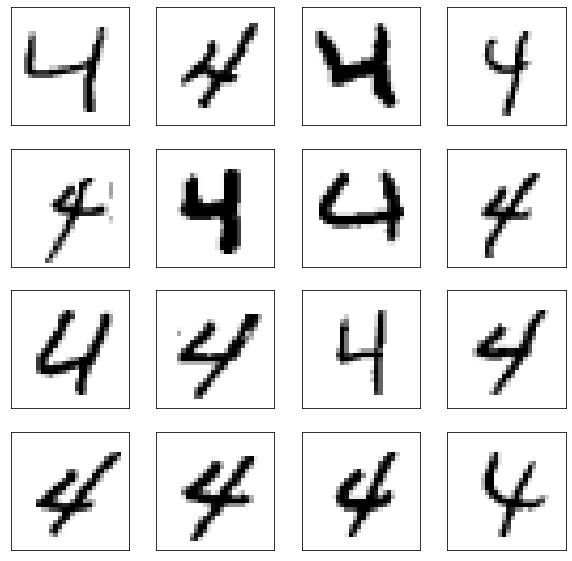

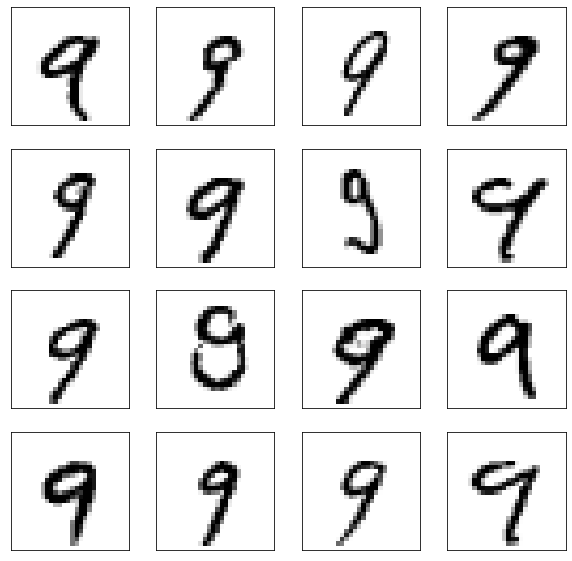

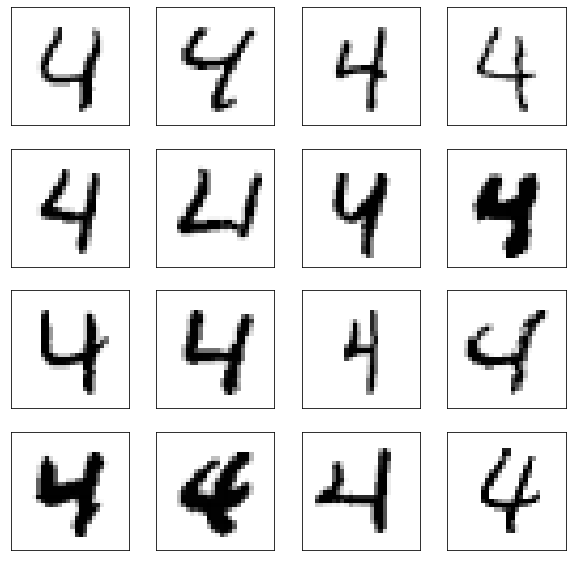

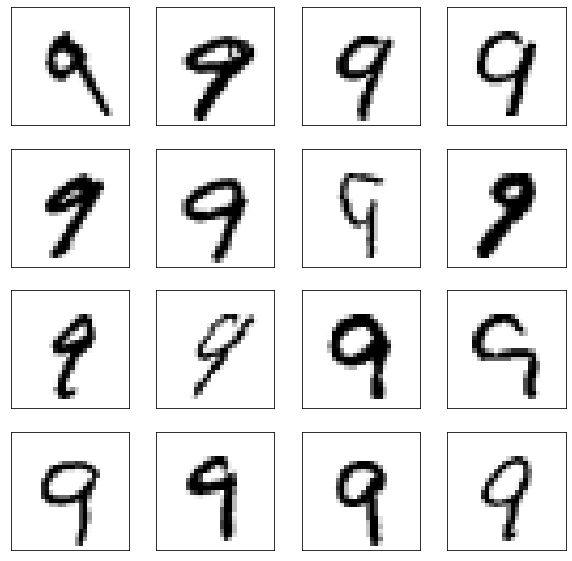

In [5]:
show_images(train_pictures_rn1[:16])
show_images(train_pictures_rn2[:16])

show_images(test_pictures_rn1[:16])
show_images(test_pictures_rn2[:16])

In [6]:
x_train = np.append(train_pictures_rn1, train_pictures_rn2, axis=0)
y_train = np.append(np.full(len(train_pictures_rn1), 0), np.full(len(train_pictures_rn2), 1), axis=0)
y_train = y_train[:, None]
                                       
x_test = np.append(test_pictures_rn1, test_pictures_rn2, axis=0)
y_test = np.append(np.full(len(test_pictures_rn1), 0), np.full(len(test_pictures_rn2), 1), axis=0)
y_test = y_test[:, None]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(11791, 1, 28, 28)
(11791, 1)
(1991, 1, 28, 28)
(1991, 1)


In [7]:
nn = Model(model_name='Binary')

In [8]:
architecture = [
        {"layer_type": "Flatten", 'input_shape': (1, 28, 28)},

        {"layer_type": "Dense", "neurons": 128, "use_bias": False},         
        {"layer_type": "BatchNorm", 'alpha': 0.99},                         
        {"layer_type": "Activation", "activation": 'relu'},
        {"layer_type": "Dropout", "ratio": .2},

        {"layer_type": "Dense", "neurons": 128, "use_bias": False},         
        {"layer_type": "BatchNorm", 'alpha': 0.99},                         
        {"layer_type": "Activation", "activation": 'relu'},
        {"layer_type": "Dropout", "ratio": .2},

        {"layer_type": "Dense", "neurons": 64, "use_bias": False},          
        {"layer_type": "BatchNorm", 'alpha': 0.99},                         
        {"layer_type": "Activation", "activation": 'relu'},
        {"layer_type": "Dropout", "ratio": .2},

        {"layer_type": "Dense",  "neurons": 64, "use_bias": False},         
        {"layer_type": "BatchNorm", 'alpha': 0.99},                         
        {"layer_type": "Activation", "activation": 'relu'},
        {"layer_type": "Dropout", "ratio": .2},

        {"layer_type": "Dense", "neurons": 32, "use_bias": False},          
        {"layer_type": "BatchNorm", 'alpha': 0.98},                         
        {"layer_type": "Activation", "activation": 'relu'},
        {"layer_type": "Dropout", "ratio": .2},

        {"layer_type": "Dense", "neurons": 32, "use_bias": False},          
        {"layer_type": "BatchNorm", 'alpha': 0.98},                         
        {"layer_type": "Activation", "activation": 'relu'},
        {"layer_type": "Dropout", "ratio": .2},

        {"layer_type": "Dense", "neurons": 1}
    ]

In [9]:
optimizer = Adam(lr=.1)

In [10]:
nn.compile(architecture, loss='binary_crossentropy', optimizer=optimizer)
nn.summary()

Binary summary:
layer-type                input_shape    output_shape    neurons    trainable-params    activation-function
------------------------  -------------  --------------  ---------  ------------------  ---------------------
Flatten                   (1, 28, 28)    (784,)          0          0                   -
Dense                     (784,)         128             128        100480              -
BatchNormalization        128            128             0          256                 -
Activation                128            128             0          0                   relu
Dropout                   128            128             0          0                   -
Dense                     128            128             128        16512               -
BatchNormalization        128            128             0          256                 -
Activation                128            128             0          0                   relu
Dropout                   128           

In [11]:
loss, acc = nn.train(x_train, y_train, batchsize=64, epochs=25, shuffle=True, x_test=x_test, y_test=y_test, policy='both')

start training [epochs: 25, batchsize: 64, shuffle: True, policy: both]
epoch 1 / 25: [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 185 of 185 batches trained (0h 0min 9sec) 
epoch 1: loss: 0.18498380638222808 acc: 0.9743847312908086
 
epoch 2 / 25: [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 185 of 185 batches trained (0h 0min 9sec) 
epoch 2: loss: 0.20181872367869755 acc: 0.9673530889000502
 
snapshot loaded!
epoch 3 / 25: [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 185 of 185 batches trained (0h 0min 9sec) 
epoch 3: loss: 0.18155388085647176 acc: 0.9814163736815671
 
epoch 4 / 25: [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 185 of 185 batches trained (0h 0min 9sec) 
epoch 4: loss: 0.1503785106117282 acc: 0.9839276745354093
 
epoch 5 / 25: [>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 185 of 185 batches trained (0h 0min 9sec) 
epoch 5: loss: 0.16727502166612235 acc: 0.9814163736815671
 
snapshot loaded!
epoch 6 / 25: [>>>>>>>>>>>>>>>>>>>>>>>>>